In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
for filename in uploaded.keys():
    df_train = pd.read_csv(filename)

# **Data Preprocessing**

In [4]:
print('This dataset has %d rows and %d columns.\n' %df_train.shape)
df_train.head()

This dataset has 891 rows and 12 columns.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Data Types: \n')
df_train.info(verbose=True)

Data Types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('The Number of Duplication is:', df_train.duplicated().sum())

The Number of Duplication is: 0


In [7]:
missing_data = df_train.isnull().sum()

print("Summary of Missing Values:")
print(missing_data)

Summary of Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# 'Age'
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# 'Cabin'
df_train['Has_Cabin'] = df_train['Cabin'].notnull().astype(int)
df_train.drop(columns=['Cabin'], inplace=True)

# 'Embarked'
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [9]:
print('Missing Values Status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing Values Status: False


,index,Total Null Values,Percentage
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,0,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


# **Features Selection**

In [10]:
# 'Sex'
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

# 'Embarked'
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

In [11]:
df_train.drop(columns=['Name', 'Ticket'], inplace=True)

In [12]:
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

# **Data Splitting**

In [13]:
survival_counts = df_train['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


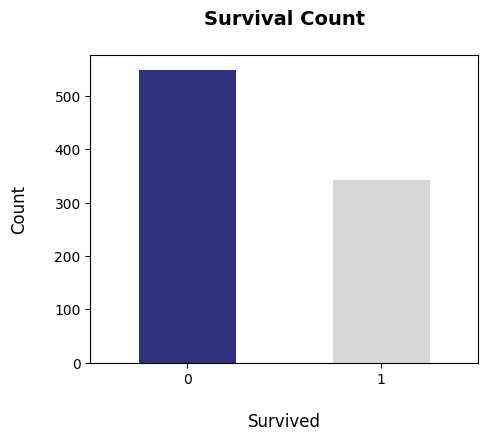

In [14]:
fig = plt.figure(figsize = (5,4))
df_train['Survived'].value_counts().plot(kind='bar', color=['midnightblue','lightgrey'], alpha=0.9, rot=0)
plt.title('Survival Count\n', fontweight='bold', fontsize=14)
plt.ylabel('Count\n', fontsize=12)
plt.xlabel('\nSurvived', fontsize=12)
plt.show()

In [15]:
df_majority = df_train[df_train['Survived'] == 0]
df_minority = df_train[df_train['Survived'] == 1]

#df_majority_downsampled = resample(df_majority,
#                                    replace=False,
#                                    n_samples=len(df_minority),
#                                    random_state=42)

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_sampled = pd.concat([df_minority_upsampled, df_majority])
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

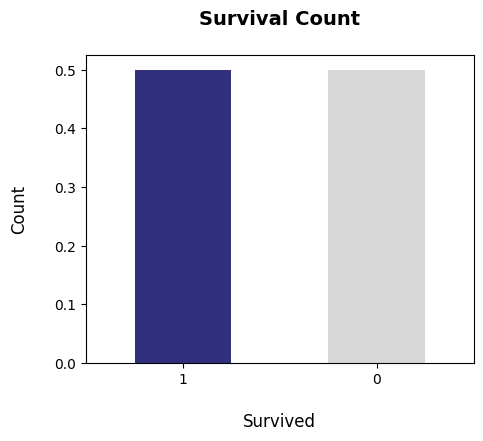

In [16]:
fig = plt.figure(figsize = (5,4))
df_sampled['Survived'].value_counts(normalize=True).plot(kind='bar', color=['midnightblue','lightgrey'], alpha=0.9, rot=0)
plt.title('Survival Count\n', fontweight='bold', fontsize=14)
plt.ylabel('Count\n', fontsize=12)
plt.xlabel('\nSurvived', fontsize=12)
plt.show()

In [17]:
x_balanced = df_sampled.drop(columns=['Survived'])
y_balanced = df_sampled['Survived']

x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.1, random_state=42)
print(x_train.shape, x_test.shape)

(988, 10) (110, 10)


# **Model Building**

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# **Validation**

In [19]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       489

    accuracy                           1.00       988
   macro avg       1.00      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988



In [20]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.89      0.92      0.90        60

    accuracy                           0.89       110
   macro avg       0.89      0.89      0.89       110
weighted avg       0.89      0.89      0.89       110



In [21]:
acc_rf_train = round(model.score(x_train, y_train) * 100, 2)
acc_rf_test = round(model.score(x_test, y_test) * 100, 2)

print("Training Accuracy: {}%".format(acc_rf_train))
print("Test Accuracy: {}%".format(acc_rf_test))

Training Accuracy: 100.0%
Test Accuracy: 89.09%


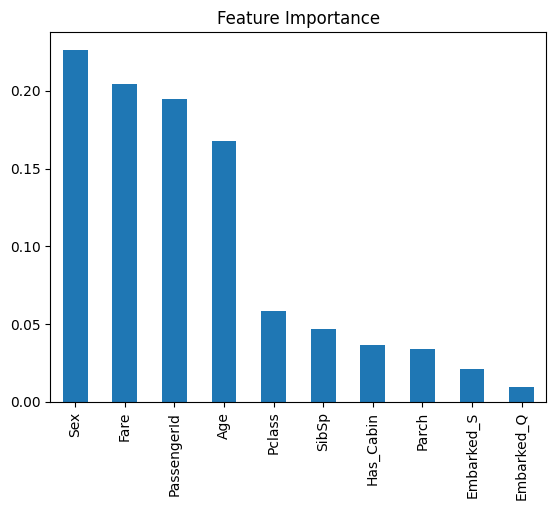

In [22]:
importances = model.feature_importances_
feature_names = x_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# **Prediction**

In [23]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [24]:
for filename in uploaded2.keys():
    df_test = pd.read_csv(filename)

In [25]:
# Missing Values
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Has_Cabin'] = df_test['Cabin'].notnull().astype(int)
df_test.drop(columns=['Cabin'], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

#  Feature Selection
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)

In [26]:
X_test = df_test

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Submission file created!")
files.download('submission.csv')

Submission file created!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>